In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier

plt.rcParams['figure.figsize'] = (12, 4)

#  Analisis exploratorio ultimos 6 meses año 2017

El analisis exploratorio que se presenta a continuacion tiene como fin determinar que feathers influyen en mayor medida a la hora de determinar el precio de un inmueble en Capital Federal y Gran Buenos Aires, asi como tambien encontrar datos curiosos en el data set.

In [2]:
sell_properati = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell-six_months.csv')

In [3]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 27 columns):
id                            121220 non-null object
created_on                    121220 non-null object
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 no

In [4]:
sell_properati['created_on'] = sell_properati['created_on'].apply(lambda x : pd.to_datetime(x))

In [5]:
sell_properati['year'] = sell_properati['created_on'].apply(lambda x : x.year)

In [6]:
sell_properati.year.unique()

array([2017])

In [7]:
sell_properati['year_month'] = sell_properati.created_on.apply(lambda x: str(x.year) + '-' + str(x.month))

In [8]:
sell_properati.year_month.unique()

array(['2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8'], dtype=object)

In [9]:
sell_properati['zone'] = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[3])

In [10]:
sell_properati = sell_properati[
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Norte' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Sur' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Oeste' ) |
    (sell_properati['state_name'] == 'Capital Federal' ) 
    ]

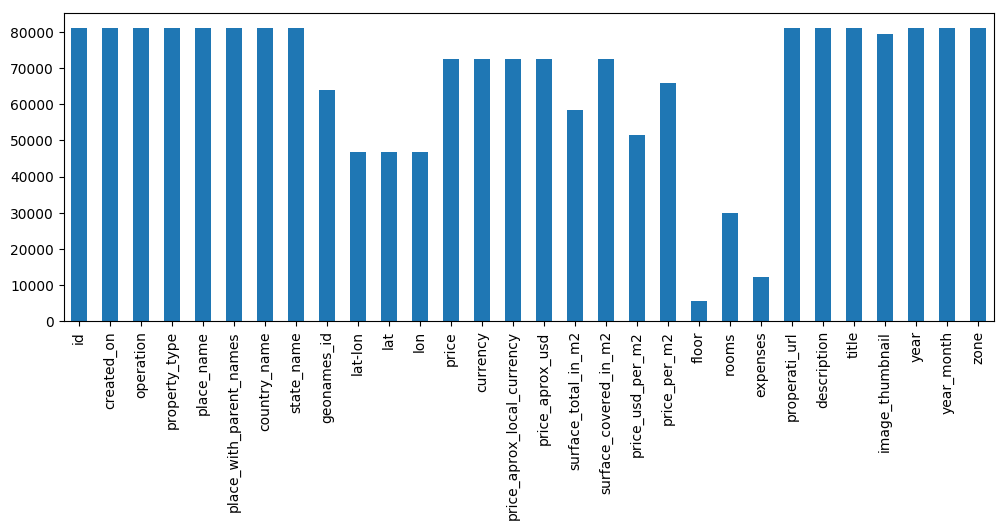

In [12]:
sell_properati.count().plot(kind='bar')

In [13]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array(['Tigre'], dtype=object)

#### Las propiedades del tigre son las unicas que no contienen informacion en 'place_name'

In [14]:
sell_properati[pd.isnull(sell_properati['place_name'])]['place_name'] = sell_properati.place_name.apply(lambda x : x if pd.notnull(x) else 'Tigre' )

In [15]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array([], dtype=object)

In [16]:
sell_properati.shape

(81150, 30)

In [17]:
sell_properati.groupby(by='id').count().shape

(81150, 29)

In [18]:
sell_properati.drop(inplace=True,labels=['id','operation','country_name','properati_url','description','image_thumbnail','title'],axis=1)

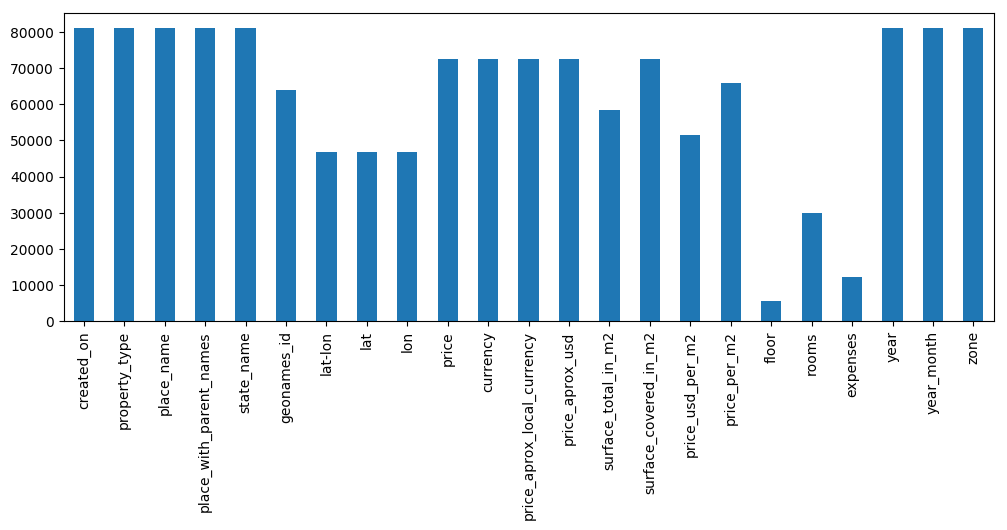

In [19]:
sell_properati.count().plot.bar()

In [20]:
sell_properati.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

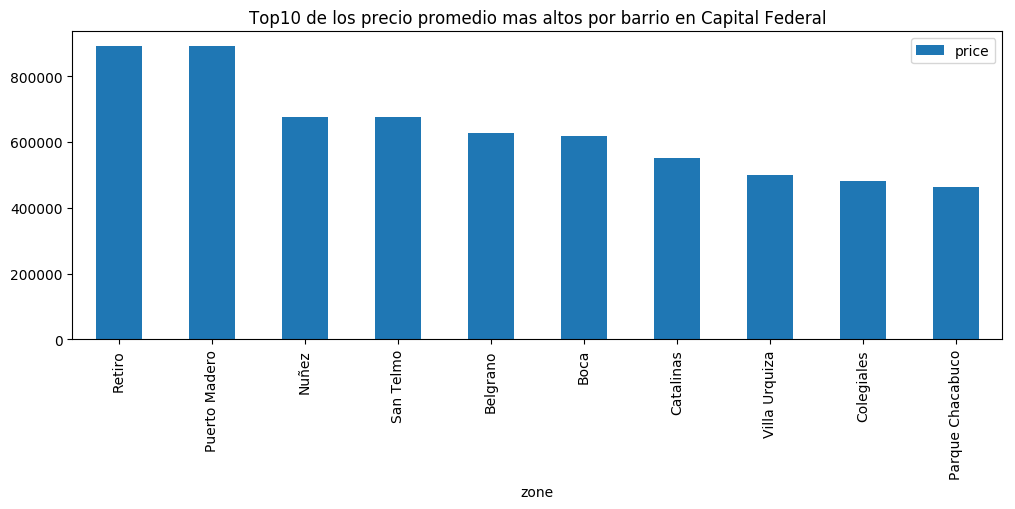

In [21]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] == 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas altos por barrio en Capital Federal')

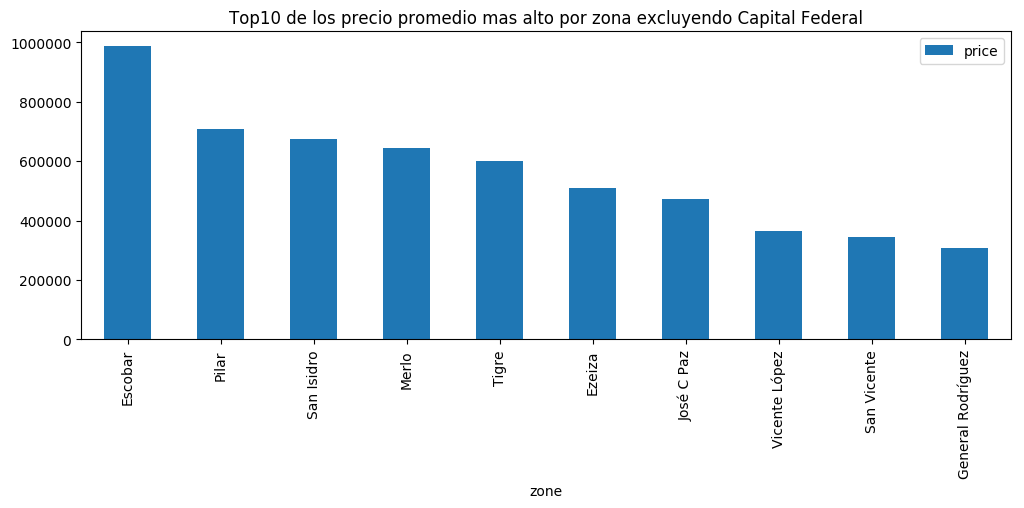

In [22]:
sell_properati[   (sell_properati['property_type'] == 'apartment') & \
                  (sell_properati['state_name'] != 'Capital Federal' )
              ].groupby(by='zone').mean()\
                .reset_index().sort_values(by='price',ascending=False).head(10)\
                .plot.bar(y='price',x='zone',title='Top10 de los precio promedio mas alto por zona excluyendo Capital Federal')

# ¿ Cual es el precio en dolares de cada propiedad ?

In [35]:
sell_properati['price'] = sell_properati.price.apply(lambda x : -1 if pd.isnull(x) else x ) 

In [36]:
sell_properati['price'] = sell_properati.price.astype(dtype=int,copy=True)

In [40]:
sell_properati.groupby(by='currency').mean()[['price','price_aprox_usd']]

,price,price_aprox_usd
currency,,
ARS,2608003,146812.985836
PEN,665000,204993.830000
USD,270601,270601.766978


In [38]:
2608003 / 146812.985836

17.76411660827684

In [41]:
sell_properati.sample()

,created_on,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,...,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,year,year_month,zone
74246,2017-07-19,house,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,NaN,NaN,NaN,248300,...,300.0,200.0,827.666667,1241.5,NaN,NaN,NaN,2017,2017-7,Mataderos


In [ ]:
se